# Temperature Forecast Project using ML

Description: In this dataset, we are going to analyse next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea.
    Here we have two outputs (i.e. next-day maximum and minimum air temperatures) and other 23 features in this data. Hindcast validation was conducted for the period from 2015 to 2017.This problem is regression type and we'll be using multiple linear regression to predict the next day min and max temperature.

In [1]:
#Loading Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [3]:
#getting the Dataset

In [4]:
temp=pd.read_csv("temperature.csv")

In [5]:
temp.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [6]:
pd.set_option('display.max_columns',None)

In [7]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [8]:
temp.shape

(7752, 25)

In [9]:
temp.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

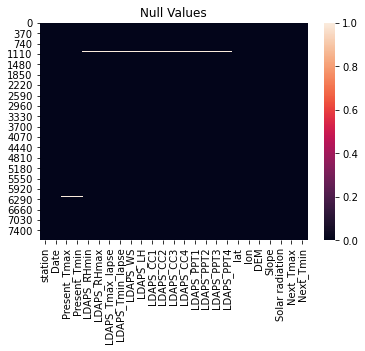

In [10]:
sns.heatmap(temp.isnull())
plt.title('Null Values')
plt.show()

In [11]:
temp.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [12]:
#Working on missing values

Here we'll be filling the missing valus of categorical columns with Mode and numerical missing values columns with Mean.

In [13]:
temp.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [14]:
temp['station'].fillna(temp['station'].mean(), inplace=True)

In [15]:
temp['Present_Tmax'].fillna(temp['Present_Tmax'].mean(), inplace=True)

In [16]:
temp['LDAPS_RHmax'].fillna(temp['LDAPS_RHmax'].mean(), inplace=True)

In [17]:
temp['LDAPS_RHmin'].fillna(temp['LDAPS_RHmin'].mean(), inplace=True)

In [18]:
temp['LDAPS_Tmax_lapse'].fillna(temp['LDAPS_Tmax_lapse'].mean(), inplace=True)

In [19]:
temp['LDAPS_Tmin_lapse'].fillna(temp['LDAPS_Tmin_lapse'].mean(), inplace=True)

In [20]:
temp['LDAPS_WS'].fillna(temp['LDAPS_WS'].mean(), inplace=True)

In [21]:
temp['LDAPS_LH'].fillna(temp['LDAPS_LH'].mean(), inplace=True)

In [22]:
temp['LDAPS_CC1'].fillna(temp['LDAPS_CC1'].mean(), inplace=True)

In [23]:
temp['LDAPS_CC2'].fillna(temp['LDAPS_CC2'].mean(), inplace=True)

In [24]:
temp['LDAPS_CC3'].fillna(temp['LDAPS_CC3'].mean(), inplace=True)

In [25]:
temp['LDAPS_CC4'].fillna(temp['LDAPS_CC4'].mean(), inplace=True)

In [26]:
temp['LDAPS_CC4'].fillna(temp['LDAPS_CC4'].mean(), inplace=True)

In [27]:
temp['LDAPS_PPT1'].fillna(temp['LDAPS_PPT1'].mean(), inplace=True)

In [28]:
temp['LDAPS_PPT2'].fillna(temp['LDAPS_PPT2'].mean(), inplace=True)

In [29]:
temp['LDAPS_PPT3'].fillna(temp['LDAPS_PPT3'].mean(), inplace=True)

In [30]:
temp['LDAPS_PPT4'].fillna(temp['LDAPS_PPT4'].mean(), inplace=True)

In [31]:
temp['Next_Tmax'].fillna(temp['Next_Tmax'].mean(), inplace=True)

In [32]:
temp['Next_Tmin'].fillna(temp['Next_Tmin'].mean(), inplace=True)

In [33]:
temp['Date'].fillna(temp['Date'].mode()[0], inplace=True)

In [34]:
temp['Present_Tmin'].fillna(temp['Present_Tmin'].mean(), inplace=True)

In [35]:
#rechecking all null values again

In [36]:
temp.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

So no null values present now. we can perform further techniques.

# EDA

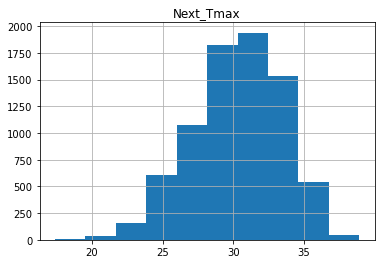

In [37]:
temp['Next_Tmax'].hist(grid=True)
plt.title("Next_Tmax")
plt.show()

Here we can see the maximum temperature graph.

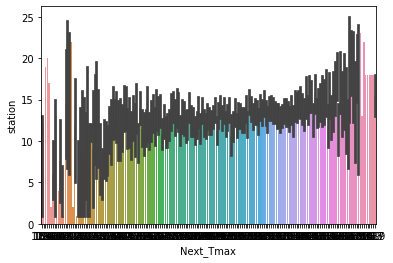

In [38]:
sns.barplot(data=temp, x='Next_Tmax', y='station')
plt.show()

Above graph showing the next day max tempertaure variations where maximum tempertaure recorded as 25

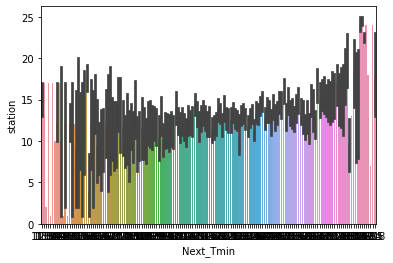

In [39]:
sns.barplot(data=temp, x='Next_Tmin', y='station')
plt.show()

Above graph showing the next day min tempertaure variations

Text(0, 0.5, 'Next_Tmax')

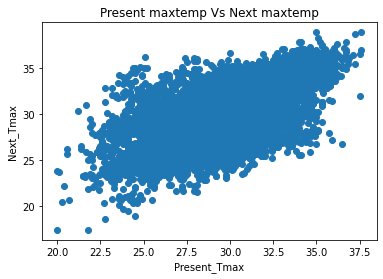

In [40]:
plt.scatter(data=temp,x='Present_Tmax', y='Next_Tmax')
plt.title("Present maxtemp Vs Next maxtemp")
plt.xlabel("Present_Tmax")
plt.ylabel("Next_Tmax")

Here we can see positive corelation between present max temp to next max temp.

Text(0, 0.5, 'Next_Tmin')

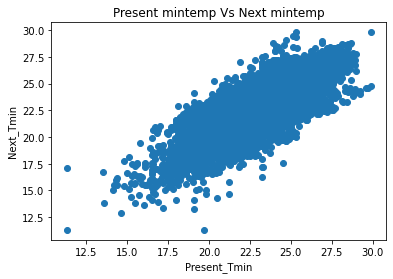

In [41]:
plt.scatter(data=temp,x='Present_Tmin', y='Next_Tmin')
plt.title("Present mintemp Vs Next mintemp")
plt.xlabel("Present_Tmin")
plt.ylabel("Next_Tmin")

Here we can see positive corelation between present min temp to next min temp.

In [42]:
temp['Date'] = pd.to_datetime(temp['Date'], format='%d-%m-%Y')
temp['year'] = temp['Date'].dt.year
temp['month'] = temp['Date'].dt.month
temp['day']=temp['Date'].dt.day
temp.head(3)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013,6,30
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013,6,30
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013,6,30


In [43]:
# Drop Date column
temp.drop('Date',axis=1,inplace=True)

In [44]:
temp.head(5)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013,6,30
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013,6,30
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013,6,30
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013,6,30
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013,6,30


Text(0, 0.5, 'Next_Tmin')

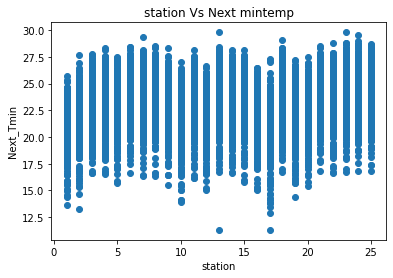

In [45]:
plt.scatter(data=temp,x='station', y='Next_Tmin')
plt.title("station Vs Next mintemp")
plt.xlabel("station")
plt.ylabel("Next_Tmin")

Aboce graph showing min temp at various stations 1-25

Text(0, 0.5, 'Present_Tmax')

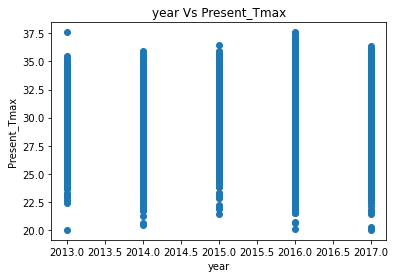

In [46]:
plt.scatter(data=temp,x='year', y='Present_Tmax')
plt.title("year Vs Present_Tmax")
plt.xlabel("year")
plt.ylabel("Present_Tmax")

In above graph we can observe the maximum temperature variation from year 2013 to 2017.

Text(0, 0.5, 'Present_Tmin')

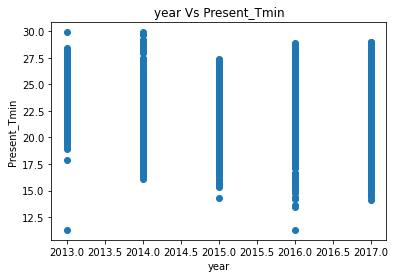

In [47]:
plt.scatter(data=temp,x='year', y='Present_Tmin')
plt.title("year Vs Present_Tmin")
plt.xlabel("year")
plt.ylabel("Present_Tmin")

In above graph we can observe the minimum temperature variation from year 2013 to 2017.

# Checking Correlation

In [48]:
temp.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
station,1.000000e+00,0.112655,0.131646,-0.066733,-0.166984,0.069107,0.104758,0.005277,-0.133357,0.006919,0.003396,0.000694,0.006126,-0.002709,-0.008250,-0.012461,-0.010401,-0.237502,-0.118704,-0.255830,-0.090061,-0.019001,0.107983,0.128293,0.000000,1.485726e-16,2.850282e-19
Present_Tmax,1.126554e-01,1.000000,0.618760,-0.204571,-0.301787,0.570129,0.623496,-0.121820,0.135463,-0.311805,-0.213791,-0.144018,-0.140729,-0.109006,-0.099449,-0.120367,-0.099607,-0.052615,0.009020,-0.187121,-0.105809,-0.025439,0.610348,0.622741,0.059904,1.460122e-01,-1.416598e-01
Present_Tmin,1.316462e-01,0.618760,1.000000,0.123143,-0.015140,0.464151,0.762993,-0.034675,-0.009258,0.084447,0.090263,-0.002772,-0.044335,0.112845,0.068176,-0.046126,-0.062965,-0.078475,-0.043461,-0.250275,-0.146339,0.053578,0.471806,0.796670,0.037785,8.755494e-02,-1.055914e-01
LDAPS_RHmin,-6.673316e-02,-0.204571,0.123143,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,0.745443,0.689679,0.514075,0.262665,0.390967,0.240642,0.168595,0.087099,-0.076237,0.102115,0.123744,0.244080,-0.437898,0.095019,-0.002104,-1.890234e-01,-6.318427e-02
LDAPS_RHmax,-1.669845e-01,-0.301787,-0.015140,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,0.391330,0.226957,0.130619,0.268449,0.229050,0.134607,0.117853,0.195798,0.025667,0.177168,0.219599,0.149261,-0.283738,-0.071997,-0.141341,-1.175143e-01,-1.450535e-02
LDAPS_Tmax_lapse,6.910718e-02,0.570129,0.464151,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,-0.523619,-0.541327,-0.429539,-0.111065,-0.242122,-0.188115,-0.160273,-0.042093,0.090666,-0.178895,-0.162332,0.047971,0.827189,0.586868,0.016358,9.745087e-02,-1.590938e-01
LDAPS_Tmin_lapse,1.047582e-01,0.623496,0.762993,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,0.047727,-0.044018,-0.080335,0.038056,0.000870,-0.088575,-0.094655,-0.096257,-0.026701,-0.195455,-0.185849,0.159975,0.586983,0.880176,-0.004447,2.353868e-02,-1.723777e-01
LDAPS_WS,5.277000e-03,-0.121820,-0.034675,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,0.261090,0.242991,0.220533,0.152587,0.191886,0.161684,0.144085,0.036657,-0.059466,0.191053,0.171629,0.121759,-0.342729,-0.096576,-0.112214,-1.121275e-01,-4.172461e-02
LDAPS_LH,-1.333566e-01,0.135463,-0.009258,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,-0.264280,-0.245583,-0.172766,-0.012542,-0.077545,0.016102,0.019979,0.133221,0.025822,0.055133,0.086781,-0.047384,0.157616,-0.055440,0.056656,6.562730e-02,-2.127868e-02
LDAPS_CC1,6.918787e-03,-0.311805,0.084447,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,0.779683,0.517493,0.361046,0.446328,0.389453,0.168742,0.091722,-0.008131,-0.006843,-0.014090,-0.020752,0.218309,-0.452541,-0.011028,-0.066621,-2.095374e-01,-2.547655e-02


<AxesSubplot:>

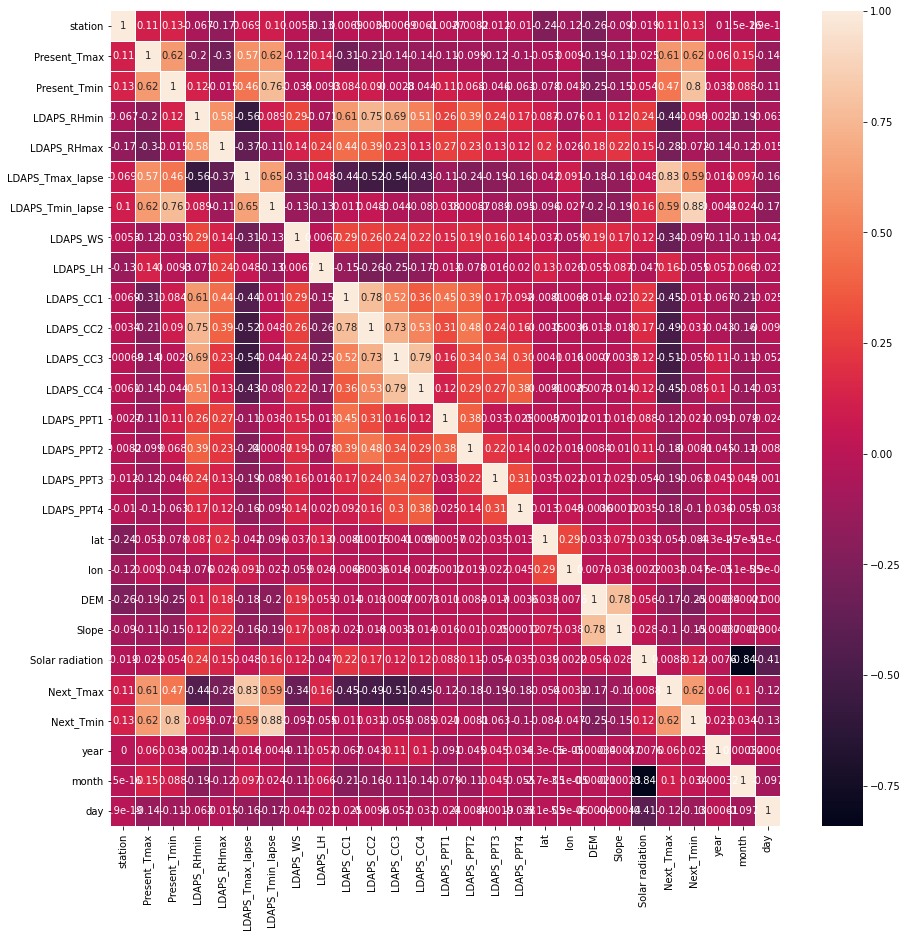

In [49]:
plt.figure(figsize=(15,15))
sns.heatmap(temp.corr(),annot=True,linewidths=0.2)

In above heatmap graph we can say few variables are showing positive correlation i.e. next-day 1st 6-hour split average cloud cover 1-4 and V 1-4 as well humidity.

# Spilitting dataset into y as target and features as x

In [50]:
target= ['Next_Tmax','Next_Tmin']

In [51]:
features = ['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_RHmin','LDAPS_Tmax_lapse',
            'LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3',
            'LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']

In [52]:
#There are 25 stations, dividing into respective stations

In [53]:
station = [[] for _ in range(26)]

for i in range(1,26):
    station[i] = temp.loc[temp['station'] == i]

In [54]:
#Now predicting the target variables at station-1 for 2017

In [55]:
train1 = station[1].loc[station[1]['year']!=2017]  
train2 = station[1].loc[station[1]['year']==2017]

In [56]:
train1 = train1.drop(['station','lat','lon','DEM','Slope','year','month','day'], axis=1)
train2 = train2.drop(['station','lat','lon','DEM','Slope','year','month','day'], axis=1)

In [57]:
x_train = train1.iloc[:, :-2].values
y_train_Tmax = train1.iloc[:, [-2]].values
y_train_Tmin = train1.iloc[:, [-1]].values

In [58]:
x_test = train2.iloc[:, :-2].values
y_test_Tmax = train2.iloc[:, [-2]].values
y_test_Tmin = train2.iloc[:, [-1]].values

# Scaling the data using MinMax Scaler

In [59]:
#Normalizing the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test  = scaler.transform(x_test)

# Model Building

We are using Multiple Linear Regression as we have two target variables.

In [60]:
from sklearn.linear_model import LinearRegression
#calling max temperature
reg_max = LinearRegression()
reg_max.fit(x_train, y_train_Tmax)


LinearRegression()

In [61]:
#calling min temperature
reg_min = LinearRegression()
reg_min.fit(x_train, y_train_Tmin)

LinearRegression()

In [62]:
#y_pred_train = reg.predict(x_train)

y_pred_Tmax  = reg_max.predict(x_test)
y_pred_Tmin  = reg_min.predict(x_test)
def score(y_pred_Tmax,train2):
    y_pred_Tmax = np.log(y_pred_Tmax)
    train2 = np.log(train2)
print(reg_max, score(y_pred_Tmax,y_test_Tmax))
print(reg_min, score(y_pred_Tmin,y_test_Tmin))

LinearRegression() None
LinearRegression() None


# Cross Validation

In [63]:
estimator = reg_max
x = x_train 
y = y_train_Tmax

In [64]:
#cross validation for maximum temperature
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
accuracies_max = cross_val_score(reg_max,x,y, cv = 10)
acc_mean_max = accuracies_max.mean()
acc_std_max  = accuracies_max.std()

In [65]:
estimator = reg_min
x = x_train 
y = y_train_Tmin

In [66]:
#cross validation for maximum temperature
from sklearn.model_selection import KFold
accuracies_min = cross_val_score(reg_min,x,y, cv = 10)
acc_mean_min = accuracies_min.mean()
acc_std_min  = accuracies_min.std()

In [67]:
kfold = {'acc_mean_max':acc_mean_max, 'acc_std_max':acc_std_max,
         'acc_mean_min':acc_mean_min, 'acc_std_min':acc_std_min}

In [68]:
acc_min = round(reg_min.score(x_train, y_train_Tmin)*100, 2)
acc_max = round(reg_max.score(x_train, y_train_Tmax)*100, 2)

acc = {'Tmax accuarcy':acc_max, 'Tmin_accuracy':acc_min}

y_pred_Tmax = pd.DataFrame(y_pred_Tmax)
y_pred_Tmin = pd.DataFrame(y_pred_Tmin)

y_pred_Tmax.columns = ['Predicted Next_Tmax']
y_pred_Tmin.columns = ['Predicted Next_Tmin']

y_pred = pd.concat([y_pred_Tmax, y_pred_Tmin], axis=1, join='inner')
test = train2
test.index = [i for i in range(0,len(test))]





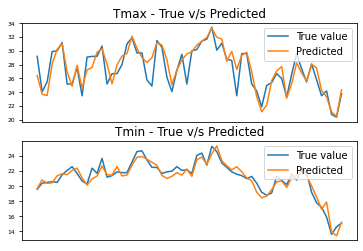

In [75]:
#plotting the results in Graph
nrows = 2
ncols = 1
fig, (x1,x2) = plt.subplots(nrows=nrows, ncols=ncols)

x1.plot(test['Next_Tmax'], label='True value')
x1.plot(y_pred['Predicted Next_Tmax'], label='Predicted')
x1.title.set_text('Tmax - True v/s Predicted')
x1.set_xticks([])
x1.tick_params(axis='y', labelsize=6)
x1.legend(loc='upper right')

x2.plot(test['Next_Tmin'], label='True value')
x2.plot(y_pred['Predicted Next_Tmin'], label='Predicted')
x2.title.set_text('Tmin - True v/s Predicted')
x2.set_xticks([])
x2.tick_params(axis='y', labelsize=6)
x2.legend(loc='upper right')

Above graphs represents the Actual and predicted value for Tmin and Tmax for Next day.

Conclusion: Using Multiple Linear Regression model predicts an accuracy of 80% for predicting next day maximum temperature(Next_Tmax) and
85% accuracy for predicting predicting next day minimum temperature (Next_Tmin) at station-1. Using same model can be useful to predict other stations next day temperature.
